In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

data_path = 'data/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

train_Y = df_train['poi'].map(lambda x : int(x))
train_num = len(train_Y)

df_train = df_train.drop(['poi'], axis=1)
print(len(df_train.columns))

df = pd.concat([df_train, df_test])

df

21


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,...,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,SHERRIFF JOHN R,1500000.0,NaN,NaN,NaN,john.sherriff@enron.com,1835558.0,NaN,92.0,28.0,...,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,GIBBS DANA R,NaN,504610.0,NaN,NaN,dana.gibbs@enron.com,2218275.0,NaN,12.0,0.0,...,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
31,LINDHOLM TOD A,200000.0,204075.0,NaN,NaN,tod.lindholm@enron.com,2549361.0,57727.0,NaN,NaN,...,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [42]:
df_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [44]:
df_train.isnull().sum()

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64

In [45]:
# 篩選數值型欄位
num_features = []
object_features = []
for c in df.columns:
    if df[c].dtype == 'float' or df[c].dtype == 'int64':
        num_features.append(c)
    else:
        object_features.append(c)
        
print('num_features length: ', len(num_features))
print('object_features length: ', len(object_features))

num_features length:  19
object_features length:  2


In [46]:
# check outliers and replace with mean
def show_img():
    plt.figure(figsize=(10 , 40))
    for i, c in enumerate(num_features):
        plt.subplot(10, 2, i+1)
#         np.log1p(df[c]).hist(bins = 50)
        sns.boxplot(df[c])
    plt.show()

C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

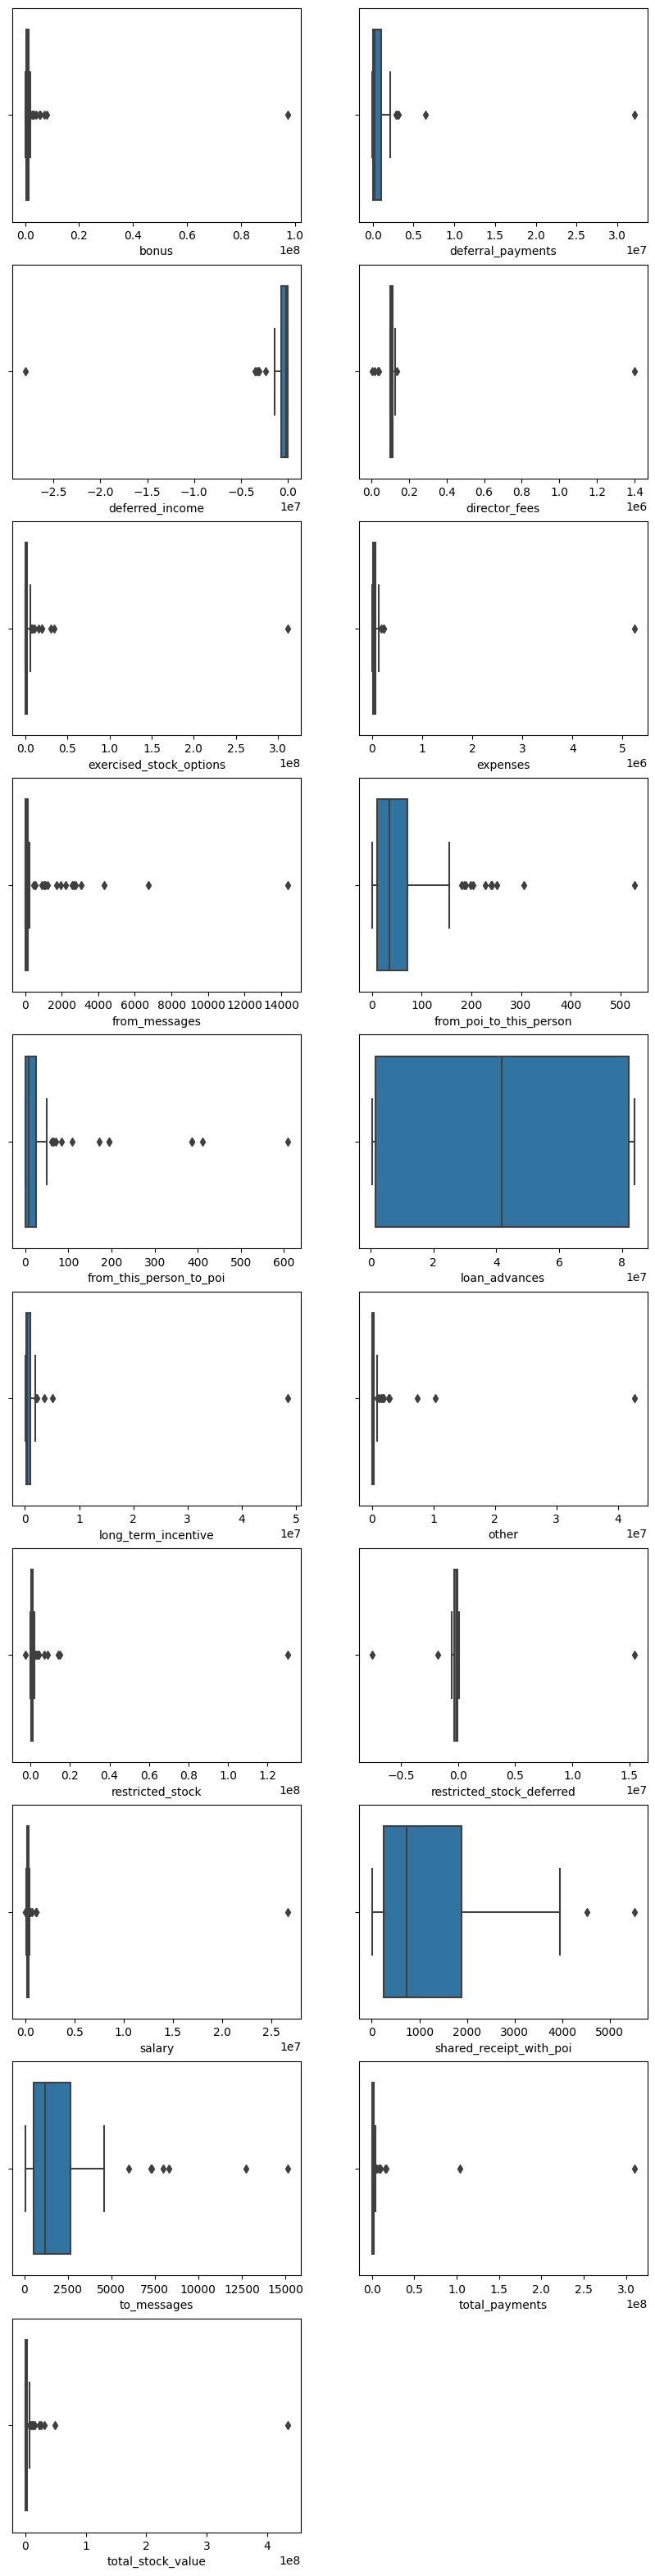

In [47]:
show_img()

In [48]:
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,...,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,SHERRIFF JOHN R,1500000.0,NaN,NaN,NaN,john.sherriff@enron.com,1835558.0,NaN,92.0,28.0,...,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,GIBBS DANA R,NaN,504610.0,NaN,NaN,dana.gibbs@enron.com,2218275.0,NaN,12.0,0.0,...,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
31,LINDHOLM TOD A,200000.0,204075.0,NaN,NaN,tod.lindholm@enron.com,2549361.0,57727.0,NaN,NaN,...,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [49]:
#補值
zero_na = ['deferral_payments' , 'deferred_income' , 'director_fees' , 'exercised_stock_options' , 'from_poi_to_this_person'
          , 'from_this_person_to_poi' , 'loan_advances' , 'long_term_incentive' , 'other' , 'restricted_stock' , 'restricted_stock_deferred'
          ,'shared_receipt_with_poi']
zero_columns = []
mean_columns =[]
for i in df.columns :
    if df[i].dtype in ['float64' , 'int64']:
        if i in zero_na:
            zero_columns.append(i)
            df[i] = df[i].fillna(0)
        else:
            mean_columns.append(i)
            df[i] = df[i].fillna(df[i].mean())
print(f'zero_num:{len(zero_columns)} , zero_na:{zero_columns}')
print('-'*20)
print(f'mean_num:{len(mean_columns)} , mean_na:{mean_columns}')

zero_num:12 , zero_na:['deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'shared_receipt_with_poi']
--------------------
mean_num:7 , mean_na:['bonus', 'expenses', 'from_messages', 'salary', 'to_messages', 'total_payments', 'total_stock_value']


In [9]:
# find outliers and replace with mean

for c in num_features:
    non_na_df = df[c][~df[c].isnull()]
    mean_non_na = non_na_df.mean()
    
    # Nan replace with mean
    df[c][df[c].isnull()] = mean_non_na
    
    IQR = non_na_df.quantile(0.75) - non_na_df.quantile(0.25)
    upper = non_na_df.quantile(0.75) + IQR * 1.5
    lower = non_na_df.quantile(0.25) - IQR * 1.5
    df[c] = df[c].clip(lower, upper)

<ipython-input-9-4b63a089ca99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][df[c].isnull()] = mean_non_na


In [50]:
df = df[num_features]
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1.750000e+06,0.0,-3504386.0,0.0,19794175.0,46950.000000,18.000000,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,4.206360e+05,864.0,905.000000,505050.0,22542539.0
1,5.600000e+06,0.0,0.0,0.0,19250000.0,29336.000000,108.000000,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1.111258e+06,2042.0,3627.000000,8682716.0,26093672.0
2,2.000000e+05,0.0,-4167.0,0.0,1624396.0,22884.000000,39.000000,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,2.118440e+05,91.0,225.000000,2003885.0,2493616.0
3,8.000000e+05,0.0,0.0,0.0,0.0,118134.000000,608.790698,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,2.243050e+05,0.0,2073.860465,2652612.0,985032.0
4,1.250000e+06,0.0,-262500.0,0.0,0.0,35818.000000,144.000000,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,2.401890e+05,2188.0,2598.000000,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1.000000e+06,0.0,0.0,0.0,1465734.0,38559.000000,40.000000,23.0,8.0,0.0,369721.0,425688.0,378082.0,0.0,2.136250e+05,1336.0,1607.000000,2047593.0,1843816.0
29,1.500000e+06,0.0,0.0,0.0,1835558.0,108728.915789,92.000000,28.0,23.0,0.0,554422.0,1852186.0,1293424.0,0.0,4.287800e+05,2103.0,3187.000000,4335388.0,3128982.0
30,2.374235e+06,504610.0,0.0,0.0,2218275.0,108728.915789,12.000000,0.0,0.0,0.0,461912.0,0.0,0.0,0.0,5.621943e+05,23.0,169.000000,966522.0,2218275.0
31,2.000000e+05,204075.0,0.0,0.0,2549361.0,57727.000000,608.790698,0.0,0.0,0.0,175000.0,2630.0,514847.0,0.0,2.364570e+05,0.0,2073.860465,875889.0,3064208.0


C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wavegis\anaconda3\envs\yienv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

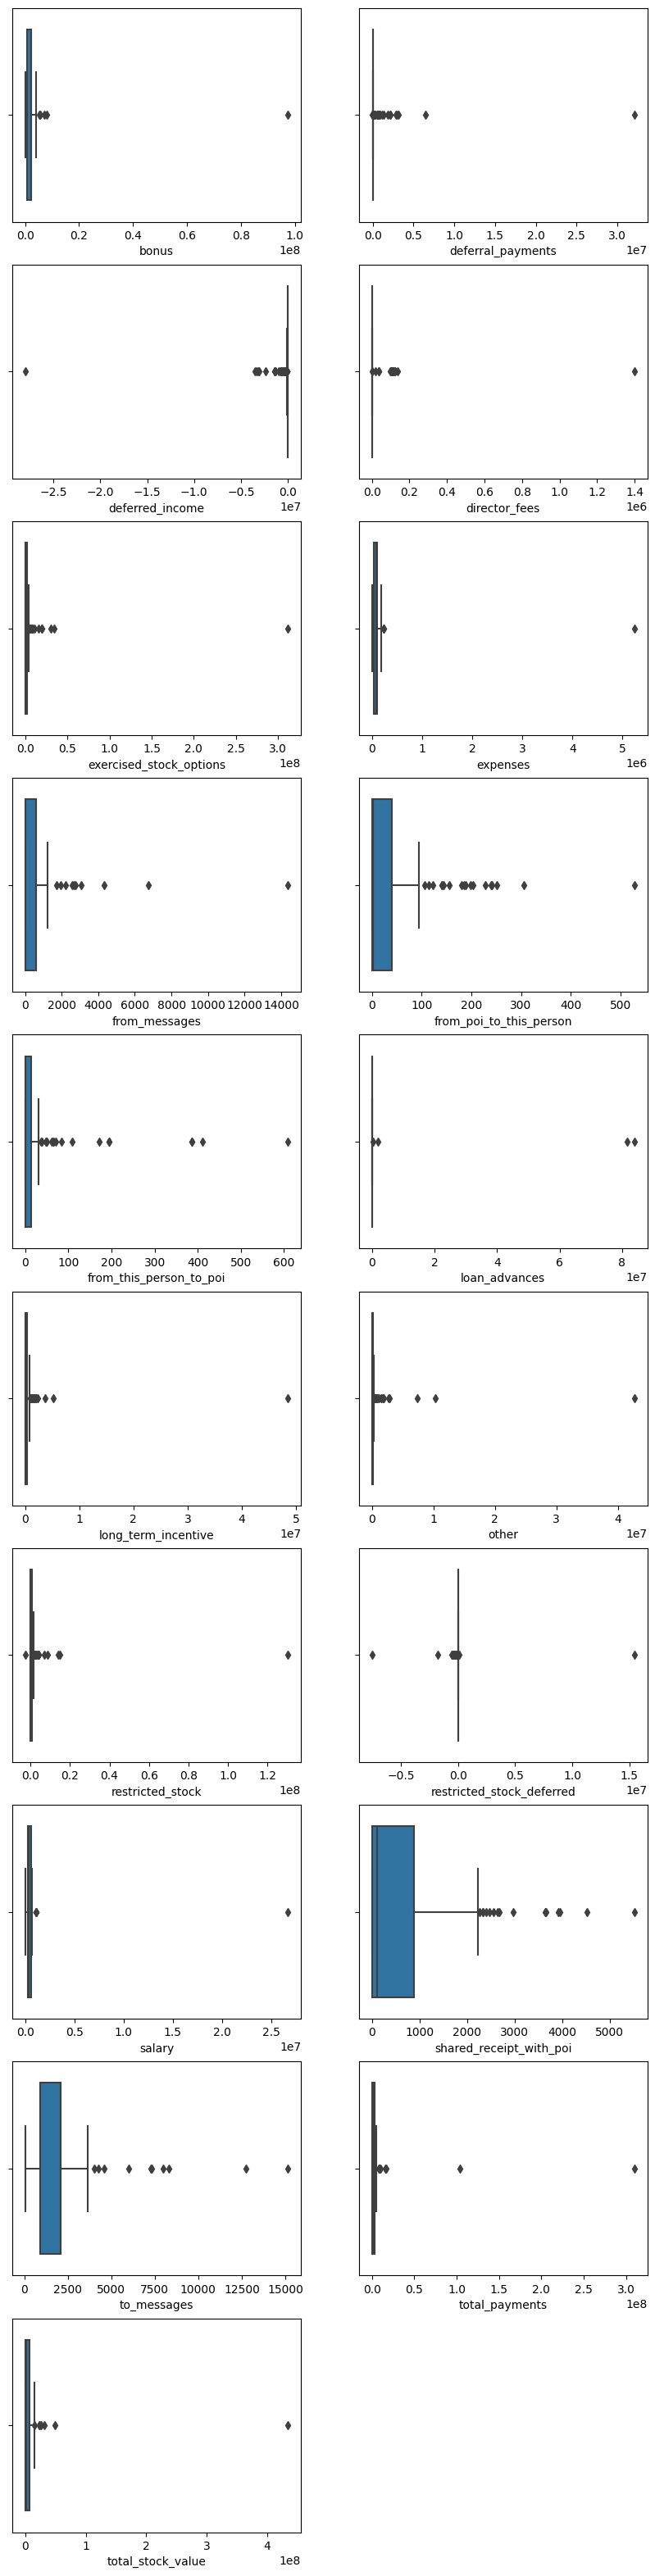

In [51]:
show_img()

In [52]:
# normalize
z_score = StandardScaler()
df_temp = z_score.fit_transform(df)

In [53]:
pd.DataFrame(df_temp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-7.822712e-02,-0.160618,-1.317090,-0.163701,0.600880,-1.443079e-01,-0.420571,0.051244,-0.256786,-0.119554,0.236181,-0.111887,0.091977,-0.0143,-6.494699e-02,0.159932,-0.593138,-0.170874,0.437441
1,4.042428e-01,-0.160618,0.161497,-0.163701,0.579935,-1.854520e-01,-0.356502,0.675840,0.072302,-0.119554,0.311323,-0.153502,0.468988,-0.0143,2.519106e-01,1.261599,0.788140,0.134459,0.535955
2,-2.724683e-01,-0.160618,0.159739,-0.163701,-0.098470,-2.005231e-01,-0.405621,-0.342523,-0.130213,-0.119554,-0.164844,0.269202,-0.081016,-0.0143,-1.607408e-01,-0.562978,-0.938203,-0.114911,-0.118742
3,-1.972781e-01,-0.160618,0.161497,-0.163701,-0.160992,2.196911e-02,0.000000,-0.519040,-0.307415,-0.119554,-0.015379,0.087764,-0.070354,-0.0143,-1.550237e-01,-0.648082,0.000000,-0.090689,-0.160592
4,-1.408856e-01,-0.160618,0.050742,-0.163701,-0.160992,-1.703108e-01,-0.330874,2.183017,0.009016,-0.119554,-0.071767,-0.159398,-0.149433,-0.0143,-1.477361e-01,1.398139,0.265974,-0.128524,-0.184422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-1.722148e-01,-0.160618,0.161497,-0.163701,-0.104577,-1.639082e-01,-0.404909,-0.206742,-0.206157,-0.119554,-0.073152,-0.043530,-0.126229,-0.0143,-1.599237e-01,0.601347,-0.236908,-0.113279,-0.136769
142,-1.095563e-01,-0.160618,0.161497,-0.163701,-0.090342,-3.399147e-17,-0.367892,-0.138851,-0.016298,-0.119554,-0.027345,0.345192,-0.041964,-0.0143,-6.121052e-02,1.318646,0.564862,-0.027859,-0.101116
143,5.835521e-17,0.024091,0.161497,-0.163701,-0.075612,-3.399147e-17,-0.424842,-0.519040,-0.307415,-0.119554,-0.050288,-0.159531,-0.161035,-0.0143,5.341139e-17,-0.626572,-0.966621,-0.153644,-0.126381
144,-2.724683e-01,-0.085918,0.161497,-0.163701,-0.062868,-1.191341e-01,0.000000,-0.519040,-0.307415,-0.119554,-0.121444,-0.158814,-0.113639,-0.0143,-1.494484e-01,-0.648082,0.000000,-0.157028,-0.102913


In [54]:
train_X = df_temp[:train_num]
test_X = df_temp[train_num:]

x_train, x_val, y_train, y_val = train_test_split(train_X, train_Y, test_size=0.1, random_state=10)
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred, y_val))
print(cross_val_score(clf, train_X, train_Y, cv=10).mean())

0.8333333333333334
0.9037878787878787


In [55]:
test_pred = clf.predict_proba(test_X)

# pd.DataFrame({'name':test['name'] , 'poi':test_pred[:,1]})
test_pred = pd.DataFrame(test_pred).reset_index()
test_pred = test_pred[['index', 1]]
test_pred.columns = ['name', 'poi']
test_pred['name'] = df_test['name']
test_pred.to_csv('submission1.csv', index=False)

In [56]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = np.linspace(100, 500, 5).astype('int64')
learning_rate = np.linspace(0.01, 0.1, 10)
max_depth = [3, 4, 5, 6, 7, 8, 9]
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

clf = GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

print('best accuracy %f using %s' %(grid_result.best_score_, grid_result.best_params_))

best accuracy 0.901429 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [57]:
clf_bestparam = GradientBoostingClassifier(n_estimators=200, learning_rate=grid_result.best_params_['learning_rate'], max_depth=grid_result.best_params_['max_depth'])
clf_bestparam.fit(x_train, y_train)
y_pred = clf_bestparam.predict(x_val)
print(accuracy_score(y_pred, y_val))
print(cross_val_score(clf, train_X, train_Y, cv=10).mean())

0.9166666666666666
0.9037878787878787


In [58]:
test_pred = clf_bestparam.predict_proba(test_X)
test_pred = pd.DataFrame(test_pred).reset_index()
test_pred = test_pred[['index', 1]]
test_pred.columns = ['name', 'poi']
test_pred['name'] = df_test['name']
test_pred.to_csv('submission2.csv', index=False)